<a href="https://colab.research.google.com/github/abhijeet10118/classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
mnist

(70000, 784)
(70000,)


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

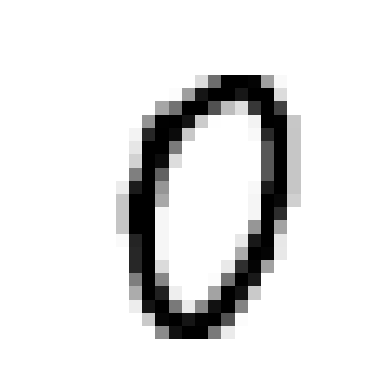

'0'

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[1000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()
y[1000]


In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [4]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)



In [5]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=10118)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=10118)

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9647 , 0.9651 , 0.96795])

In [7]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [8]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train,y_train_5, cv=3,scoring="accuracy")

array([0.9061 , 0.91275, 0.9101 ])

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53705,   874],
       [ 1171,  4250]])

In [10]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8294301327088213

In [11]:
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

0.7839881940601365

In [12]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.8060692271218587

In [13]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

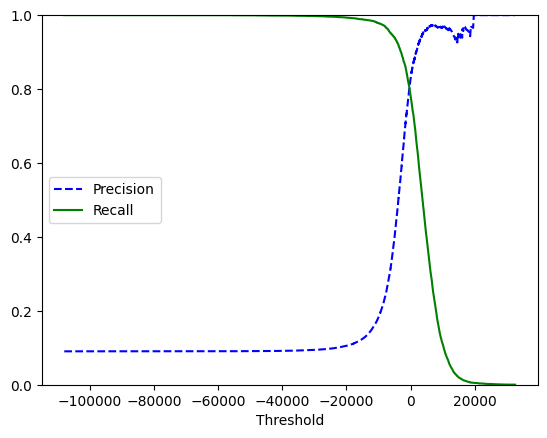

In [14]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="center left")
 plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [15]:
y_train_pred_90 = (y_scores > 5000)
precision_score(y_train_5, y_train_pred_90)



0.9601789709172259

In [16]:
recall_score(y_train_5, y_train_pred_90)

0.3958679210477772

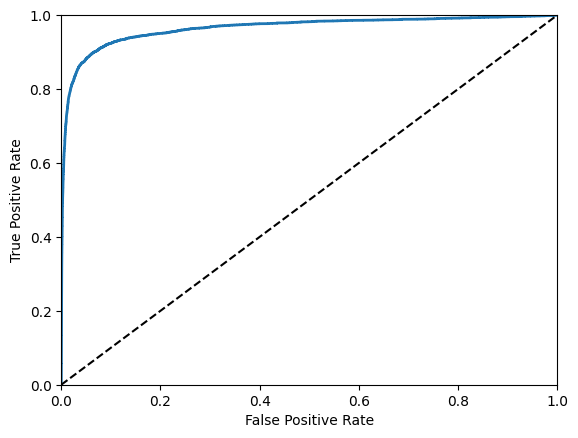

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9645722977829129)

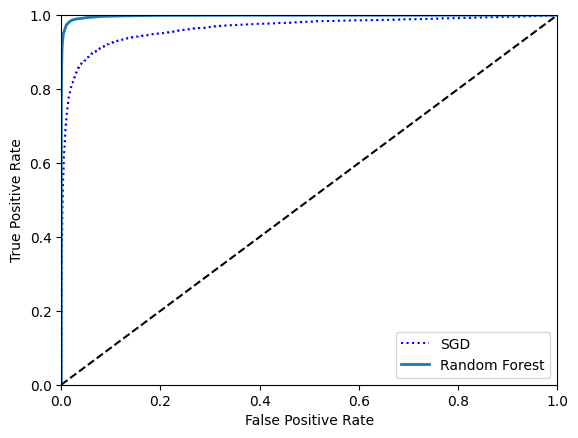

np.float64(0.9983059254873815)

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)


In [20]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([0], dtype=uint8)

In [21]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ 15343.79800784, -36794.16408459,  -6904.82863712,
        -11898.14912792, -15978.66618685,     62.54309314,
        -14590.15898674, -13794.4345028 ,  -1464.21178802,
         -6468.50181988]])

In [22]:
np.argmax(some_digit_scores)


np.int64(0)

In [23]:
sgd_clf.classes_



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
sgd_clf.classes_[5]


np.uint8(5)

In [25]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)



45

In [26]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([0], dtype=uint8)

In [27]:
forest_clf.predict_proba([some_digit])

array([[0.94, 0.  , 0.01, 0.  , 0.  , 0.04, 0.  , 0.01, 0.  , 0.  ]])

In [28]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86395, 0.88195, 0.86525])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9007 , 0.9033 , 0.90285])

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5600,    0,   17,    6,    8,   45,   35,    5,  206,    1],
       [   1, 6420,   45,   20,    3,   45,    5,    8,  184,   11],
       [  25,   28, 5256,   90,   73,   29,   64,   43,  340,   10],
       [  30,   20,  113, 5266,    1,  213,   26,   41,  353,   68],
       [  13,   14,   47,   13, 5242,   12,   35,   19,  293,  154],
       [  27,   19,   29,  150,   50, 4518,   80,   17,  471,   60],
       [  25,   15,   50,    2,   40,   97, 5565,    4,  119,    1],
       [  22,   16,   55,   25,   50,   11,    5, 5709,  167,  205],
       [  18,   69,   40,   94,    3,  118,   32,    8, 5425,   44],
       [  26,   24,   31,   56,  124,   37,    1,  174,  340, 5136]])

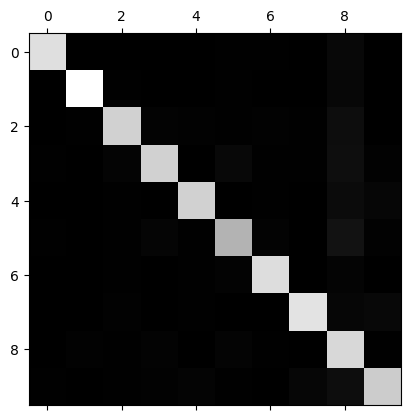

In [31]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

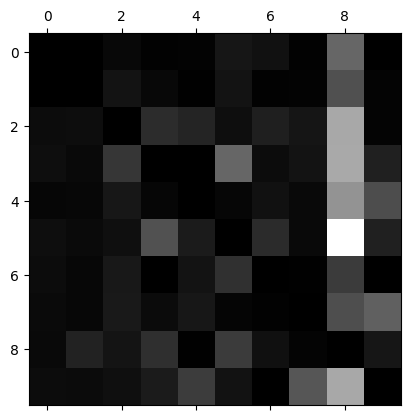

In [32]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [33]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

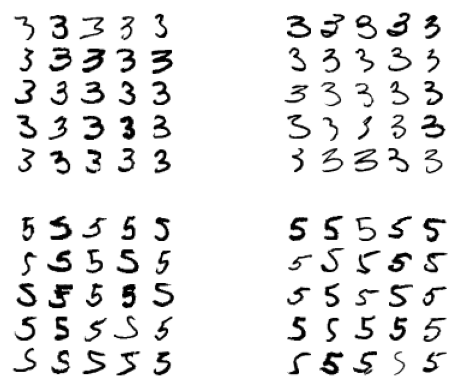

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,images_per_row * size)
    plt.imshow(big_image, cmap = plt.cm.binary, **options)
    plt.axis("off")
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [38]:
knn_clf.predict([some_digit])

array([[False, False]])

In [39]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9773358820758515

In [40]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

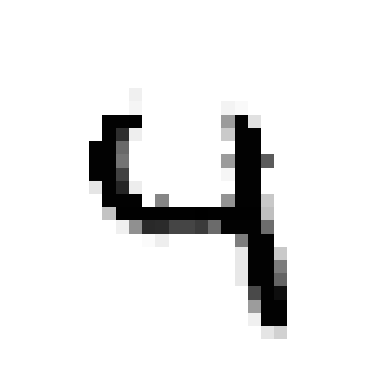

In [47]:


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary, interpolation="nearest")
    plt.axis("off")
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4000]])
plot_digit(clean_digit)
